In [25]:
#because the last layer takes input from relu and the y signal is positive; so the last layer's weight should be positively initialized.
#layer-wise weight init: study intialization effects on relu diff idea. Can you find a more accurate model by different initialization?

import torch
import torch.nn as nn
import torch.nn.init as init
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import time


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
batch_size = 100
learning_rate = 0.001
num_workers=0

num_epochs = 5

transform = transforms.ToTensor()
train_data = datasets.MNIST(root='/Users/dongcui/github/visualising-cnns/data', train=True,
                                   download=False, transform=transform)
test_data = datasets.MNIST(root='/Users/dongcui/github/visualising-cnns/data', train=False,
                                  download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers, shuffle = True)

Epoch [1/5], Step [100/600], Loss: 0.2399
Epoch [1/5], Step [200/600], Loss: 0.1367
Epoch [1/5], Step [300/600], Loss: 0.1416
Epoch [1/5], Step [400/600], Loss: 0.1378
Epoch [1/5], Step [500/600], Loss: 0.0749
Epoch [1/5], Step [600/600], Loss: 0.1253
Epoch [2/5], Step [100/600], Loss: 0.1318
Epoch [2/5], Step [200/600], Loss: 0.0969
Epoch [2/5], Step [300/600], Loss: 0.0902
Epoch [2/5], Step [400/600], Loss: 0.0247
Epoch [2/5], Step [500/600], Loss: 0.0405
Epoch [2/5], Step [600/600], Loss: 0.0861
Epoch [3/5], Step [100/600], Loss: 0.1014
Epoch [3/5], Step [200/600], Loss: 0.0689
Epoch [3/5], Step [300/600], Loss: 0.0465
Epoch [3/5], Step [400/600], Loss: 0.0512
Epoch [3/5], Step [500/600], Loss: 0.0274
Epoch [3/5], Step [600/600], Loss: 0.0829
Epoch [4/5], Step [100/600], Loss: 0.0556
Epoch [4/5], Step [200/600], Loss: 0.0598
Epoch [4/5], Step [300/600], Loss: 0.0607
Epoch [4/5], Step [400/600], Loss: 0.0107
Epoch [4/5], Step [500/600], Loss: 0.1072
Epoch [4/5], Step [600/600], Loss:

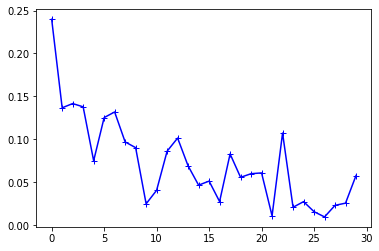

0.07258784153188268
torch.Size([500, 100])
np.count_nonzero(output_relu)= 19763
sparsity 0.60474
Accuracy of the network on the 10000 test images: 97.72 %


In [34]:
def relu_diff(input1, input2):
    '''this is sparse: two level-relu'''
    return torch.max(input1 - input2, torch.zeros_like(input1))
    
class ReLU_my(nn.Module):
    '''
    Applies the Sigmoid Linear Unit (SiLU) function element-wise:
        SiLU(x) = x * sigmoid(x)
    Shape:
        - Input: (N, *) where * means, any number of additional
          dimensions
        - Output: (N, *), same shape as the input
    References:
        -  Related paper:
        https://arxiv.org/pdf/1606.08415.pdf
    Examples:
        >>> m = silu()
        >>> input = torch.randn(2)
        >>> output = m(input)
    '''
    def __init__(self):
        '''
        Init method.
        '''
        super().__init__() # init the base class
    
    def forward(self, input1, input2):
        '''
        Forward pass of the function.
        '''
        return relu_diff(input1, input2)

def weights_init(m):
    if type(m) == nn.Linear:
#         m.weight.data.normal_(0.0, 1)#93% accuracy for relu; 
#         m.weight.data.normal_(-1, 1)# 11% accuracy for relu; 93.62 for this idea. 
        m.weight.data.normal_(1, 1)#92.87
    
def weight_sparse(m):
    if isinstance(m, nn.Linear):
#         init.sparse_(m.weight.data, 0.3, 0.01)
#         init.sparse_(m.weight.data, 0.7, 0.01)
        init.sparse_(m.weight.data, 0.7, 0.1)
#         init.sparse_(m.weight.data, 0.7, 1.0)#worse

def weight_layer_wise(m):
    #98.12% fc3 using default
#     init.sparse_(m.fc1.weight.data, 0.7, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)

    #98.14% fc3 using default
#     init.sparse_(m.fc1.weight.data, 0.3, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
    
    #98.28. 98.0 98.03: there is randomness
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
    
    #98.04
#     init.sparse_(m.fc1.weight.data, 0.01, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
    
    #98.18
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.5, 0.1)
    
    #97.88
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.9, 0.1)

    #97.79
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
#     init.sparse_(m.fc3.weight.data, 0.7, 0.1)

    #97.99
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
#     init.sparse_(m.fc3.weight.data, 0.1, 0.1)
    
    #97.99
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)

    #97.69
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
    
    #98.15, 97.92
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.uniform_(m.fc1.bias.data, 0, 0.01)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
#     init.uniform_(m.fc2.bias.data, 0, 0.01)
    
    #98.07
#     init.sparse_(m.fc1.weight.data, 0.1, 0.1)
#     init.uniform_(m.fc1.bias.data, -0.01, 0.01)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.1)
#     init.uniform_(m.fc2.bias.data, -0.01, 0.01)
    
    #97.53
#     init.sparse_(m.fc1.weight.data, 0.1, 0.5)
#     init.uniform_(m.fc1.bias.data, -0.01, 0.01)
#     init.sparse_(m.fc2.weight.data, 0.7, 0.5)
#     init.uniform_(m.fc2.bias.data, -0.01, 0.01)
    
    #97.72
    init.sparse_(m.fc1.weight.data, 0.1, 0.01)
    init.uniform_(m.fc1.bias.data, -0.01, 0.01)
    init.sparse_(m.fc2.weight.data, 0.7, 0.01)
    init.uniform_(m.fc2.bias.data, -0.01, 0.01)
    
# print(np.random.binomial(1, 0.5, 5))

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(input_size, hidden_size) 
        self.relu = ReLU_my()
        self.fc3 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = x
        
        out1 = self.fc1(out)
        out2 = self.fc2(out)
        
        out_relu = self.relu(out1, out2)
        out = self.fc3(out_relu)
        return out, out_relu  
#optionally add a sigmoid to the blocking; not sparse
#     def forward(self, x):
#         out = x
        
#         out1 = self.fc1(out)
#         out2 = self.fc2(out)
#         out2 = self.sigmoid(out2)
        
#         out_relu = self.relu(out1, out2)
#         out = self.fc3(out_relu)
#         return out, out_relu  

#now I can define my model
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
#model.apply(weight_sparse)
weight_layer_wise(model)


#visualzing graphs
# writer=SummaryWriter('runs/experiment_1')
# dataiter=iter(train_loader)
# images, labels = dataiter.next()
# # print(images.shape)
# grid = torchvision.utils.make_grid(images)
# #writer.add_image('images', grid, 0)

# #images = images.reshape(-1, 28*28).to(device)
# dummy_input = torch.zeros(1, 28*28),
# writer.add_graph(model, dummy_input)
# writer.close()

start = time.time()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
losses=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs, _  = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            losses.append(loss.item())
            

print('elapsed: ', time.time()-start)
plt.plot(losses, '-b+')
plt.show()
print(np.mean(losses))

#check dead neurons
dataiter=iter(train_loader)
images, labels = dataiter.next()
images = images.reshape(-1, 28*28).to(device)
# print(images.shape)
A1 = images[:300]
# print(A1.shape)
output, output_relu = model(A1)

output_relu = output_relu.T.detach()
print(output_relu.shape)
# plt.plot(output_relu.numpy(), '-b+')
# plt.show()
print('np.count_nonzero(output_relu)=', np.count_nonzero(output_relu))
print('sparsity', 1- np.count_nonzero(output_relu)/ (output_relu.shape[0] * output_relu.shape[1]))


# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
labels_wrong = []
pred_wrong = []
img_wrong = []
with torch.no_grad():
    correct = 0
    total = 0
    for img, labels in test_loader:
#         print(img.shape)
        images = img.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs, _ = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        wrong_preds = (predicted != labels).numpy()
        wrong_index = []
        for (i, wrong) in enumerate(wrong_preds):
            if wrong:
                wrong_index.append(i) 
        if len(wrong_index) > 0:
            img_reshaped = img[wrong_index].numpy()[:,0,:,:]
            for img_w in range(img_reshaped.shape[0]):
                img_wrong.append(img_reshaped[img_w])
            labels_wrong  += (labels[wrong_index].numpy().tolist())
            pred_wrong += (predicted[wrong_index].numpy().tolist())
#     print(img_wrong)
#     print('img_wrong.shape', img_wrong[0].shape)
#     print('lables_wrong =', labels_wrong)
#     print('predictions wrong are:', pred_wrong)
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

#show wrong images:
# print(len(img_wrong), ', ', len(labels_wrong), ', ', len(pred_wrong))
# for i in range(len(img_wrong)):
#     plt.imshow(img_wrong[i])
#     print('labels_wrong[i]:', labels_wrong[i])
#     print('pred_wrong[i]', pred_wrong[i])
#     plt.pause(1)

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')


In [277]:
print('layer 1:')
w_fc1 = list(model.fc1.parameters())
print(w_fc1)

print('layer 2:')
w_fc2 = list(model.fc2.parameters())
print(w_fc2)

[Parameter containing:
tensor([[-0.5779,  0.0640,  0.1430, -0.1617, -0.5140,  0.3530,  0.5737, -0.1477,
          0.1958, -0.1691],
        [ 0.4743,  0.2682, -0.5371, -0.1988,  0.2150, -0.6793, -0.1516,  0.6180,
         -0.3148, -0.7621],
        [ 0.2593, -0.1268, -0.0784,  0.0650,  0.3511, -0.3761,  0.4965, -0.7066,
          0.4375, -0.4512],
        [-0.4706,  0.6136, -0.5341, -0.2328,  0.5161, -0.2980, -0.2179, -0.1023,
          0.1481,  0.2383],
        [ 0.0301, -0.7920,  0.7271, -0.2208,  0.5299,  0.3283, -0.6619, -0.1630,
         -0.1853, -0.2730],
        [-0.7178, -0.2460, -0.3829, -0.0773,  0.0664,  0.3904, -0.1010,  0.4212,
          0.1781,  0.1411],
        [ 0.1937, -0.3704,  0.1585, -0.1834, -0.6606,  0.0736, -0.4391,  0.3063,
          0.6534, -0.7792],
        [ 0.3262,  0.5748,  0.1930, -0.1342, -0.3776,  0.3556,  0.1013, -0.6247,
         -0.7301,  0.2556],
        [ 0.2724, -0.5699, -0.5487,  0.0173,  0.0711,  0.0028, -0.0344,  0.0607,
          0.2700,  0.423

Accuracy of the network on the 10000 test images: 97.12 %


In [ ]:
#future work
def relu_at(A, threshold):
    return torch.max(A, torch.ones_like(A) * threshold)

def relu_min_at(A, threshold):
    return torch.min(A, torch.ones_like(A) * threshold)

class ThresholdingNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThresholdingNet2, self).__init__()
        self.maxlu = ReLU_my()
        self.minlu = ReLU_min()
        self.fc1 = nn.Linear(input_size*2, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = x
        
        out1 = self.maxlu(out)
        out2 = self.minlu(out)
        out = torch.cat((out1, out2), dim=1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out  
    
# model = ThresholdingNet(input_size, hidden_size, num_classes).to(device)
model = ThresholdingNet2(input_size, hidden_size, num_classes).to(device)